# ML Project from Zachary Janati & Chafi Khermouche & Rodi Unlubayir

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from typing import Tuple, Union
import random 
from tqdm.notebook import *
import scipy
import math 
from typing import Union

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

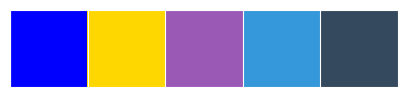

In [2]:
sns_couleurs = ["Blue","Gold","#9b59b6", 
                "#3498db","#34495e"]
sns_palette = sns.color_palette(sns_couleurs)
sns.set_style("darkgrid")
cm = sns.light_palette("green", as_cmap=True)

sns.palplot(sns_palette)
sns.set_palette(sns_palette)

In [3]:
data=pd.read_csv(r'C:\Users\janat\Desktop\ML Project\data.csv')
data=data.dropna(subset=['Date'])
data.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [4]:
data.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

data.drop('Date', axis=1, inplace=True)

data = pd.get_dummies(data, columns=['Holiday_Flag'])
print(data)

      Store  Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
0         1    1643690.90        42.31       2.572  211.096358         8.106   
1         1    1641957.44        38.51       2.548  211.242170         8.106   
2         1    1611968.17        39.93       2.514  211.289143         8.106   
3         1    1409727.59        46.63       2.561  211.319643         8.106   
4         1    1554806.68        46.50       2.625  211.350143         8.106   
...     ...           ...          ...         ...         ...           ...   
6430     45     713173.95        64.88       3.997  192.013558         8.684   
6431     45     733455.07        64.89       3.985  192.170412         8.667   
6432     45     734464.36        54.47       4.000  192.327265         8.667   
6433     45     718125.53        56.47       3.969  192.330854         8.667   
6434     45     760281.43        58.85       3.882  192.308899         8.667   

      Year  Month  DayOfWeek  Holiday_F

# Data exploration

In [5]:
print(f'Notre dataset comporte {data.shape[0]} lignes et {data.shape[1]} colonnes.')

Notre dataset comporte 6435 lignes et 11 colonnes.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store           6435 non-null   int64  
 1   Weekly_Sales    6435 non-null   float64
 2   Temperature     6435 non-null   float64
 3   Fuel_Price      6435 non-null   float64
 4   CPI             6435 non-null   float64
 5   Unemployment    6435 non-null   float64
 6   Year            6435 non-null   int32  
 7   Month           6435 non-null   int32  
 8   DayOfWeek       6435 non-null   int32  
 9   Holiday_Flag_0  6435 non-null   bool   
 10  Holiday_Flag_1  6435 non-null   bool   
dtypes: bool(2), float64(5), int32(3), int64(1)
memory usage: 389.7 KB


In [7]:
data.isnull().sum()

Store             0
Weekly_Sales      0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
Year              0
Month             0
DayOfWeek         0
Holiday_Flag_0    0
Holiday_Flag_1    0
dtype: int64

In [8]:
numerical_data=data[['Weekly_Sales','Temperature','Fuel_Price','CPI', 'Unemployment']]
list_cols=['Weekly_Sales','Temperature','Fuel_Price','CPI', 'Unemployment']

In [9]:
def display_distribution(df: pd.DataFrame,
                         numerical_cols: list):
    plt.figure(figsize=(20,10))
    i = 0
    for column_ in numerical_cols:
        i = i+ 1
        plt.subplot(2, 4, i)
        sns.distplot(df[column_], label='Data', hist=False)
        plt.xlabel(numerical_cols[i-1], fontsize=12)

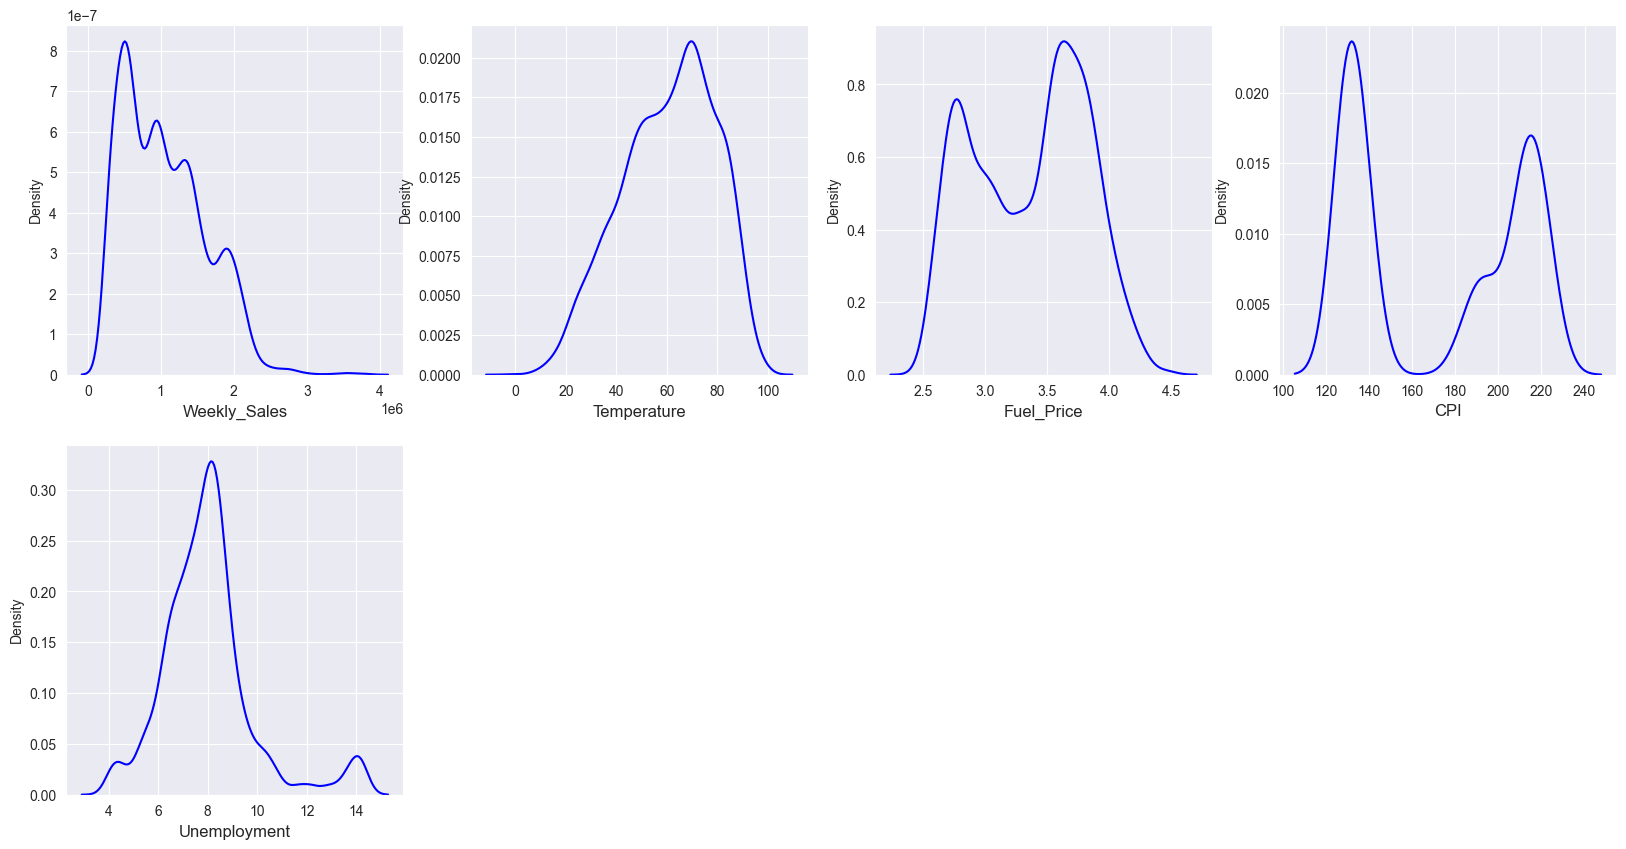

In [10]:
display_distribution(numerical_data,list_cols)

In [11]:
display(data.describe())

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,DayOfWeek
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0
mean,23.000000,1.046965e+06,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,4.0
std,12.988182,5.643666e+05,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,0.0
min,1.000000,2.099862e+05,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,4.0
25%,12.000000,5.533501e+05,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,4.0
50%,23.000000,9.607460e+05,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,4.0
75%,34.000000,1.420159e+06,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,4.0
max,45.000000,3.818686e+06,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,4.0


# Constat

In [12]:
def display_boxplot(df: pd.DataFrame,
                    numerical_cols: list):
    plt.figure(figsize=(20,8))
    i = 0
    for columns_ in numerical_cols:
        i = i+1
        plt.subplot(2, 4, i)
        box = sns.boxplot(x=df[columns_], data=df, palette=sns_palette)

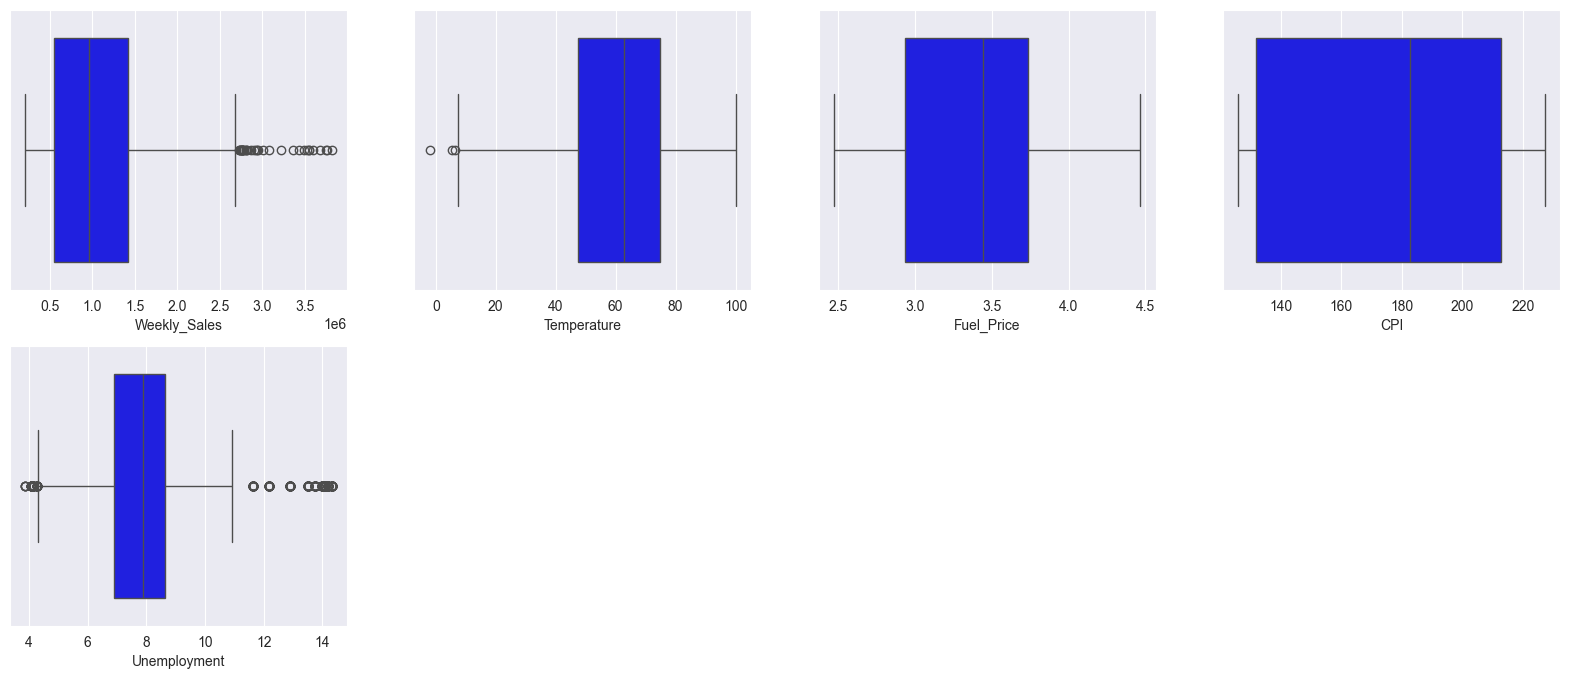

In [13]:
display_boxplot(numerical_data,list_cols)

In [14]:
#Nombre de NA
missing_values = data.isna().sum()
print(missing_values)

#Pour avoir le pourcentage aussi mais ca ne change rien car nous n'avons aucune valeur manquante ;)
nvc = pd.DataFrame(data.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data.shape[0],3)*100
print(nvc)

Store             0
Weekly_Sales      0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
Year              0
Month             0
DayOfWeek         0
Holiday_Flag_0    0
Holiday_Flag_1    0
dtype: int64
                Total Null Values  Percentage
Store                           0         0.0
Weekly_Sales                    0         0.0
Temperature                     0         0.0
Fuel_Price                      0         0.0
CPI                             0         0.0
Unemployment                    0         0.0
Year                            0         0.0
Month                           0         0.0
DayOfWeek                       0         0.0
Holiday_Flag_0                  0         0.0
Holiday_Flag_1                  0         0.0


In [15]:
counter = 0
rs,cs = data.shape

data.drop_duplicates(inplace=True)

# DataViz

In [16]:
def display_countplot(df: pd.DataFrame, col_x: str, title: str, hue: Union[None, str] = None):
    temp = df.copy()
    nb_rows = temp.shape[0]
    
    sns_palette = 'viridis'
    
    fig = plt.figure(figsize=(11, 6))
    
    if hue is None:
        splot = sns.countplot(x=temp[col_x], palette=sns_palette)
    else:
        splot = sns.countplot(x=temp[col_x], hue=temp[hue], palette=sns_palette)
    splot.set_title(title, fontsize=20)

    for p in splot.patches:
        splot.annotate(format((p.get_height() / nb_rows), '.2%'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center',
                       va='center',
                       xytext=(0, 10),
                       textcoords='offset points')
    
    plt.show()

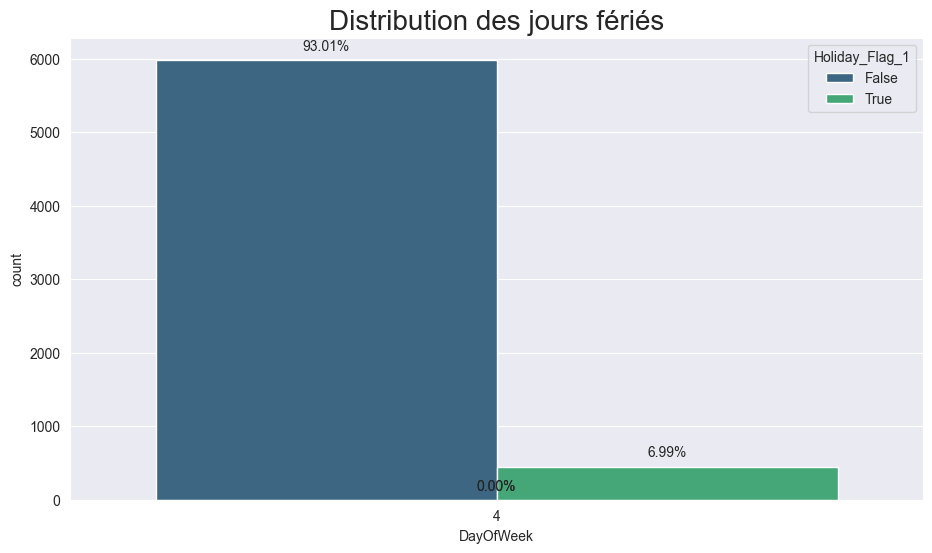

In [32]:
display_countplot(data, col_x='DayOfWeek', titre='Distribution des jours fériés', hue='Holiday_Flag_1')


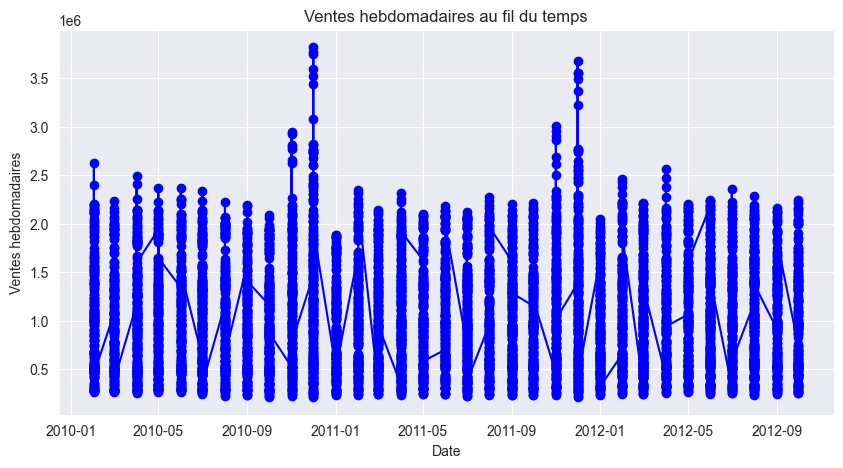

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Création d'une colonne 'Date' temporaire pour le graphique
temporary_date = pd.to_datetime(data.assign(Day=1)[['Year', 'Month', 'Day']])

# Tri des données par la colonne 'Date' temporaire
sorted_indices = temporary_date.argsort()
sorted_data = data.iloc[sorted_indices]
sorted_dates = temporary_date.iloc[sorted_indices]

# Création du graphique
plt.figure(figsize=(10, 5))
plt.plot(sorted_dates, sorted_data['Weekly_Sales'], marker='o')
plt.title('Ventes hebdomadaires au fil du temps')
plt.xlabel('Date')
plt.ylabel('Ventes hebdomadaires')
plt.grid(True)
plt.show()

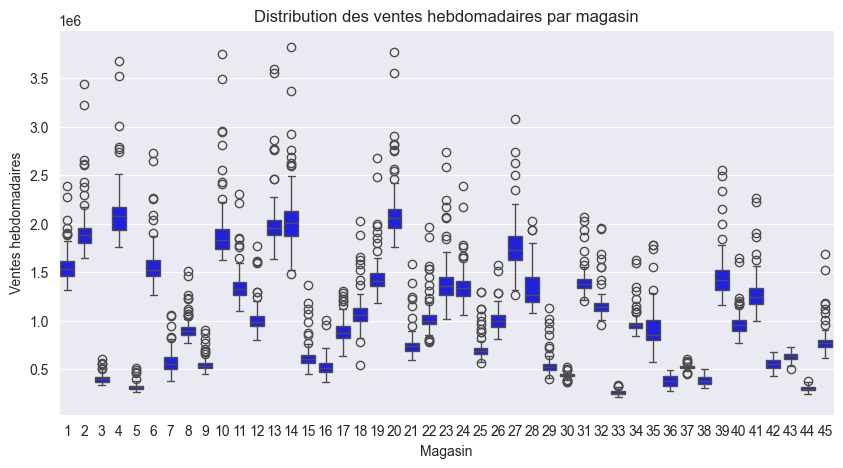

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Store', y='Weekly_Sales', data=data)
plt.title('Distribution des ventes hebdomadaires par magasin')
plt.xlabel('Magasin')
plt.ylabel('Ventes hebdomadaires')
plt.show()

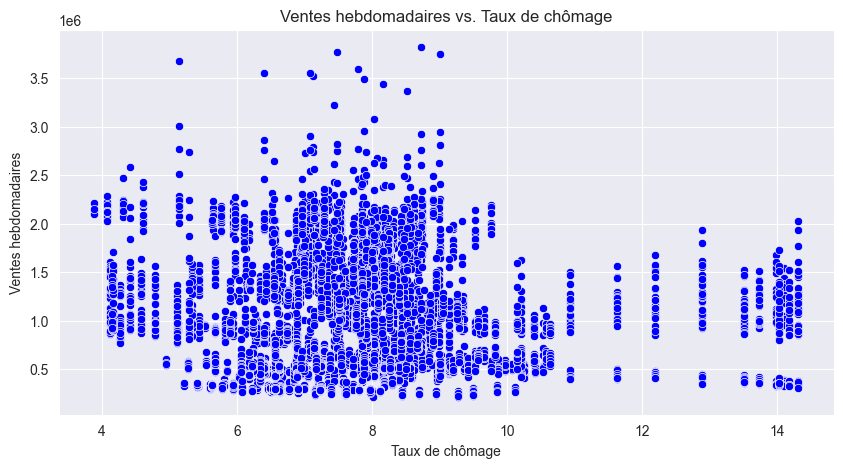

In [21]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Ventes hebdomadaires vs. Taux de chômage')
plt.xlabel('Taux de chômage')
plt.ylabel('Ventes hebdomadaires')
plt.show()

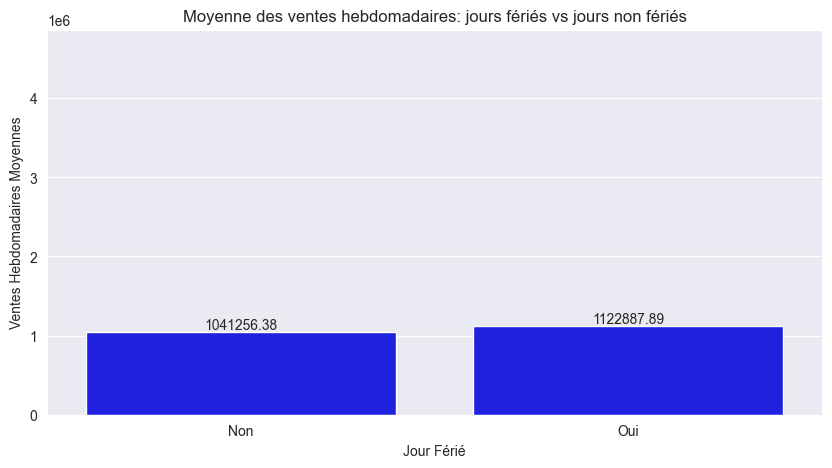

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

data['Weekly_Sales'] = data['Weekly_Sales'].astype(float)

data['Holiday'] = data.apply(lambda row: 'Oui' if row['Holiday_Flag_1'] else 'Non', axis=1)

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x='Holiday', y='Weekly_Sales', data=data, estimator=np.mean, ci=None, order=['Non', 'Oui'])

for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')

plt.title('Moyenne des ventes hebdomadaires: jours fériés vs jours non fériés')
plt.xlabel('Jour Férié')
plt.ylabel('Ventes Hebdomadaires Moyennes')
plt.ylim(0, data['Weekly_Sales'].max() + data['Weekly_Sales'].mean())  # Ajustez les limites de l'axe y si nécessaire
plt.show()

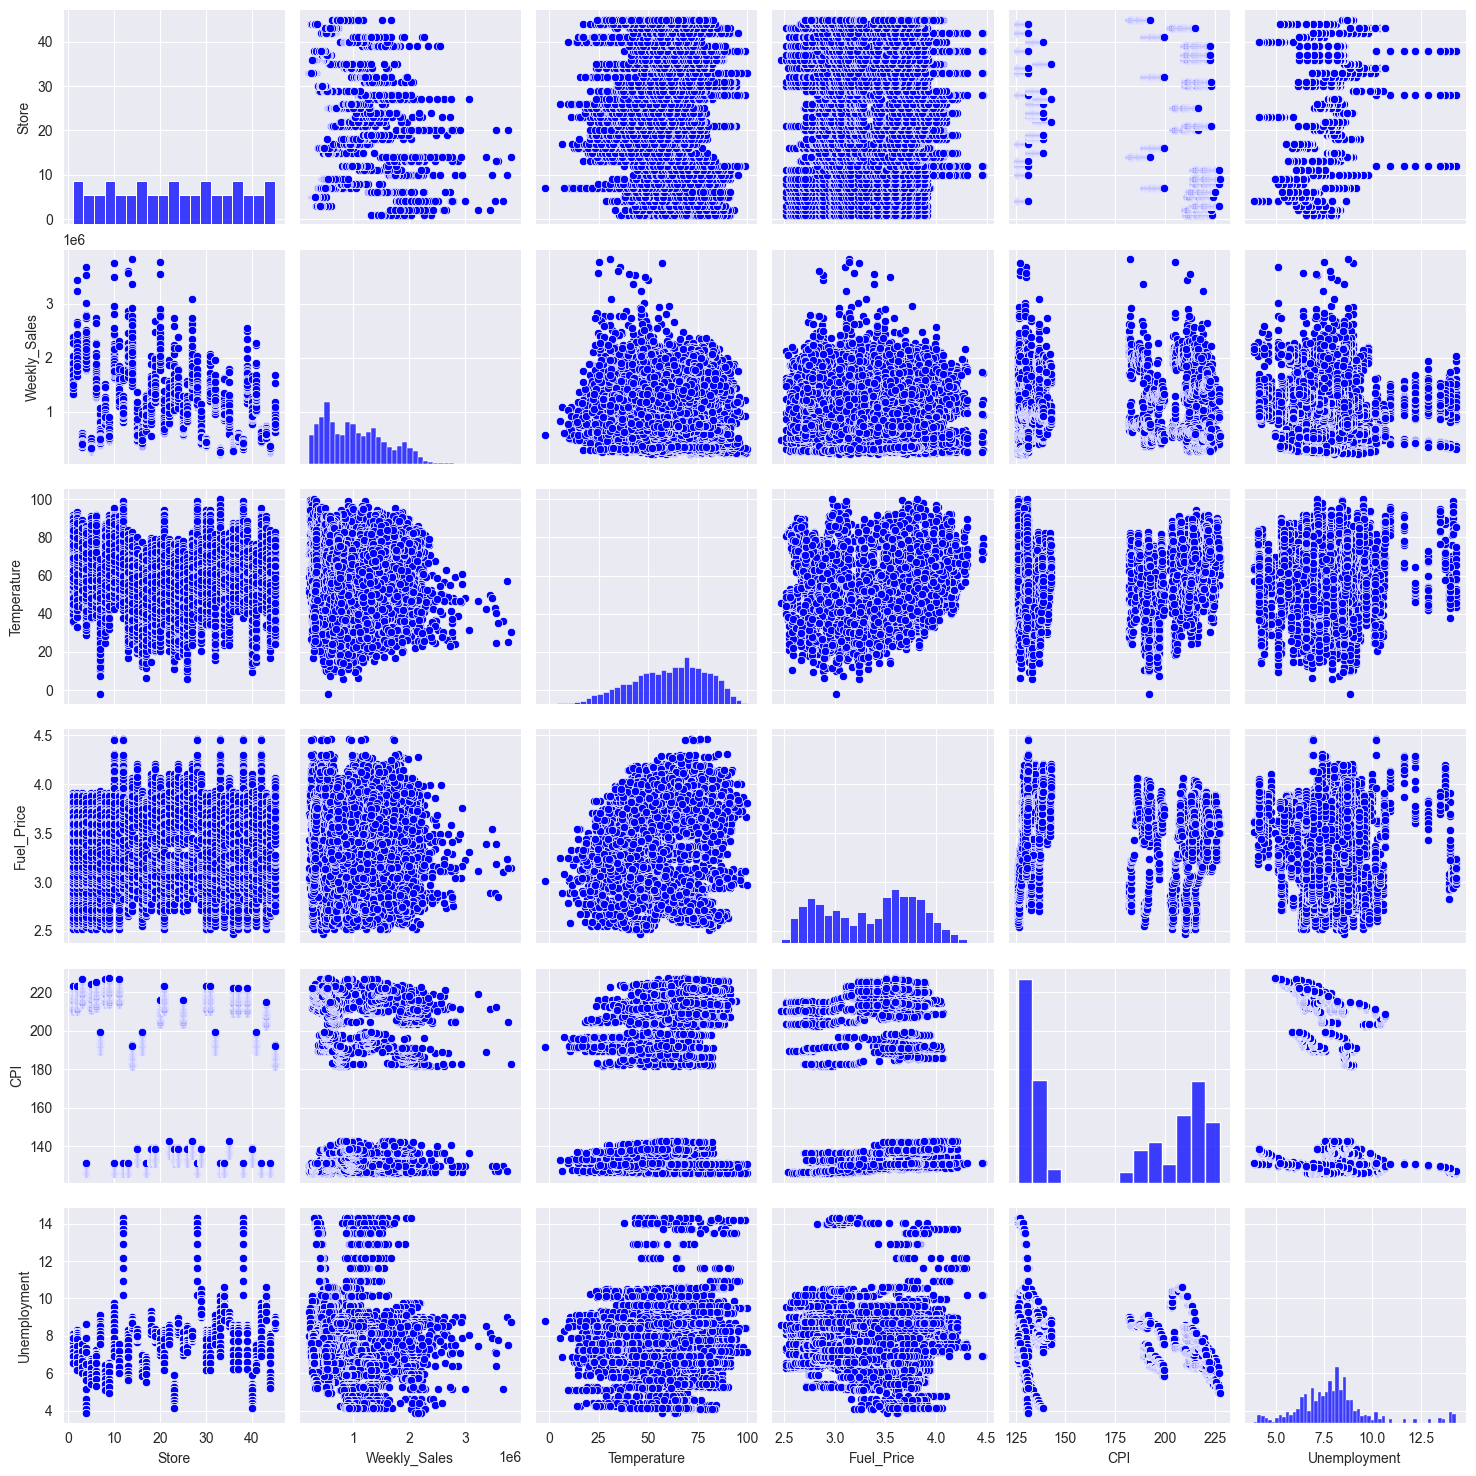

In [23]:
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()

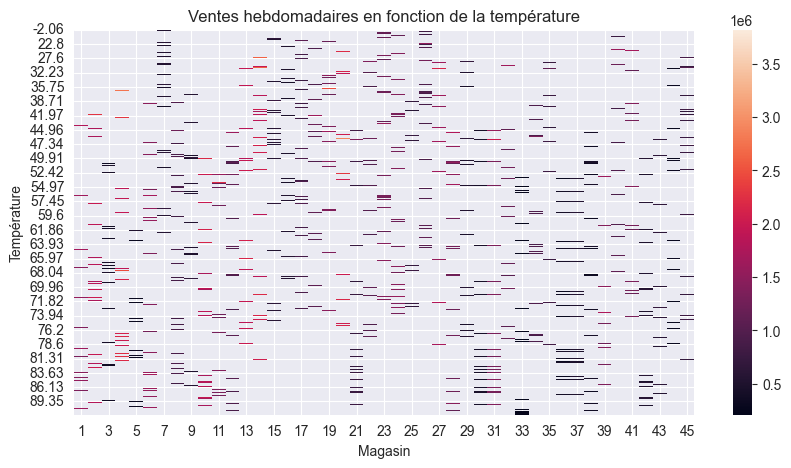

In [28]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.pivot_table(values='Weekly_Sales', index='Temperature', columns='Store'))
plt.title('Ventes hebdomadaires en fonction de la température')
plt.xlabel('Magasin')
plt.ylabel('Température')
plt.show()

# Modélisation

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

X = data.drop(['Weekly_Sales', 'Holiday'], axis=1)
y = data['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['Store'])

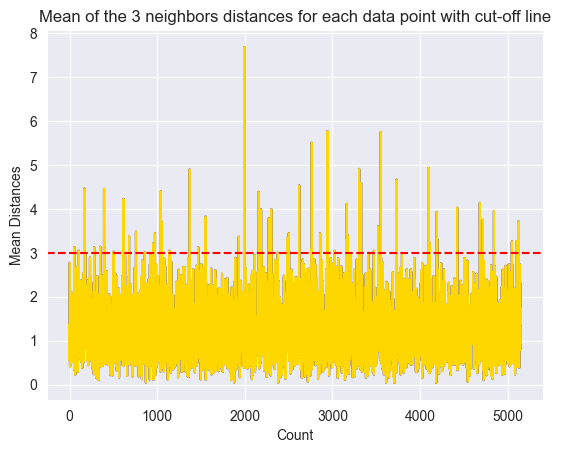

In [56]:
nbrs = NearestNeighbors(n_neighbors = 3)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 3 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 3 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 3, color = 'r', linestyle = '--')

In [57]:
outlier_index = np.where(dist_means > 3)
outlier_index

outlier_values = data.iloc[outlier_index]
outlier_values

outlier_index = list(outlier_index[0])
data = data.drop(outlier_index)

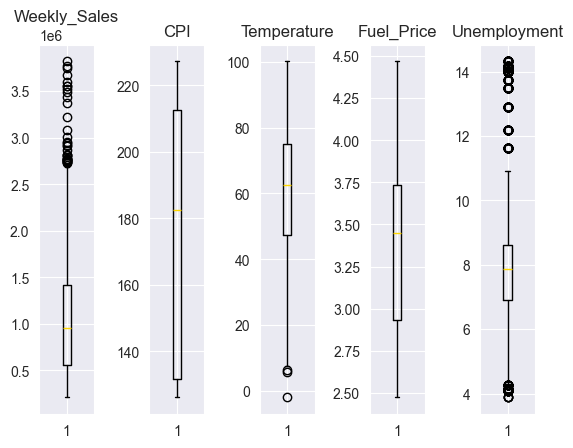

Indexes des outliers: {5699, 5700, 5294, 5701, 5295, 5702, 5296, 5703, 5297, 5704, 5298, 5705, 5299, 5706, 5300, 5707, 5301, 5708, 5302, 5709, 5303, 5710, 5304, 5711, 5305, 5712, 5306, 5713, 5307, 5714, 5308, 5715, 5309, 5716, 5310, 5717, 5311, 5718, 5719, 5312, 5313, 5314, 5315, 5316, 5317, 5318, 5319, 5320, 5321, 5322, 5323, 5324, 5325, 5326, 5327, 189, 241, 2336, 471, 474, 475, 523, 526, 527, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 5416, 2759, 2761, 2762, 2763, 761, 2811, 2814, 2815, 910, 3890, 3192, 3895, 5291, 5292, 5293, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 5328, 5329, 5330, 5331, 5332, 5333, 5334, 5335, 5336, 5337, 5338, 5339, 5340, 5341, 5342, 5343, 5344, 5345, 5346, 5347, 5348, 5349, 5350, 5351, 5352, 5353, 5354, 53

In [58]:
variables = ['Weekly_Sales', 'CPI', 'Temperature', 'Fuel_Price', 'Unemployment']

fig, axes = plt.subplots(nrows=1, ncols=len(variables))
fig.subplots_adjust(wspace=1)

for i in range(len(variables)):
    axes[i].boxplot(data[variables[i]])
    axes[i].set_title(variables[i])

plt.show()

outlier_index = []

for variable in variables:
    # Calcul de l'IQR
    Q1 = np.percentile(data[variable], 25)
    Q3 = np.percentile(data[variable], 75)
    IQR = Q3 - Q1
    
    outlier_flag = (data[variable] < Q1 - 1.5 * IQR) | (data[variable] > Q3 + 1.5 * IQR)
    outlier_index.extend(data[outlier_flag].index)

print("Indexes des outliers:", set(outlier_index))

data_clean = data.drop(set(outlier_index))

print(data_clean)

In [59]:
outlier_threshold = 1.5

for variable in variables:
    Q1 = np.percentile(data[variable], 25)
    Q3 = np.percentile(data[variable], 75)
    IQR = Q3 - Q1

    # Identifier les indices des outliers
    outlier_indices = ((data[variable] < (Q1 - outlier_threshold * IQR)) |
                       (data[variable] > (Q3 + outlier_threshold * IQR)))

    # Remplacer les outliers par la moyenne du store en question
    for store_id in data['Store'].unique():
        store_mean = data[data['Store'] == store_id][variable].mean()
        store_outlier_indices = outlier_indices & (data['Store'] == store_id)
        data.loc[store_outlier_indices, variable] = store_mean

data = data.reset_index(drop=True)
print(data)

      Store  Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
0         1    1643690.90        42.31       2.572  211.096358         8.106   
1         1    1641957.44        38.51       2.548  211.242170         8.106   
2         1    1611968.17        39.93       2.514  211.289143         8.106   
3         1    1409727.59        46.63       2.561  211.319643         8.106   
4         1    1554806.68        46.50       2.625  211.350143         8.106   
...     ...           ...          ...         ...         ...           ...   
6371     45     713173.95        64.88       3.997  192.013558         8.684   
6372     45     733455.07        64.89       3.985  192.170412         8.667   
6373     45     734464.36        54.47       4.000  192.327265         8.667   
6374     45     718125.53        56.47       3.969  192.330854         8.667   
6375     45     760281.43        58.85       3.882  192.308899         8.667   

      Year  Month  DayOfWeek  Holiday_F

In [60]:
from sklearn.model_selection import train_test_split
X = data.drop(['Weekly_Sales'], axis=1)
y = data['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['Store'])

store_counts = data['Store'].value_counts()
print(store_counts)

Store
45    143
39    143
26    143
32    143
35    143
37    143
15    143
28    143
13    143
12    143
38    143
9     143
40    143
41    143
42    143
43    143
44    143
10    142
34    142
19    142
4     142
21    142
22    142
31    142
27    142
30    141
29    141
1     141
2     141
5     141
6     141
17    141
7     141
24    141
14    141
25    140
8     140
3     140
23    140
11    140
36    140
18    140
33    140
20    140
16    139
Name: count, dtype: int64


# Best Subset Selection

Processed 65 models on 1 predictors in 0.14391613006591797 seconds.
Processed 64 models on 2 predictors in 0.15485358238220215 seconds.
Processed 63 models on 3 predictors in 0.17357349395751953 seconds.
Processed 62 models on 4 predictors in 0.18709826469421387 seconds.
Processed 61 models on 5 predictors in 0.2403557300567627 seconds.
Processed 60 models on 6 predictors in 0.2265012264251709 seconds.
Processed 59 models on 7 predictors in 0.2507517337799072 seconds.
Processed 58 models on 8 predictors in 0.2773714065551758 seconds.
Processed 57 models on 9 predictors in 0.2610950469970703 seconds.
Processed 56 models on 10 predictors in 0.27908873558044434 seconds.
Processed 55 models on 11 predictors in 0.2846395969390869 seconds.
Processed 54 models on 12 predictors in 0.2951622009277344 seconds.
Processed 53 models on 13 predictors in 0.3362915515899658 seconds.
Processed 52 models on 14 predictors in 0.6604845523834229 seconds.
Processed 51 models on 15 predictors in 0.3696932792

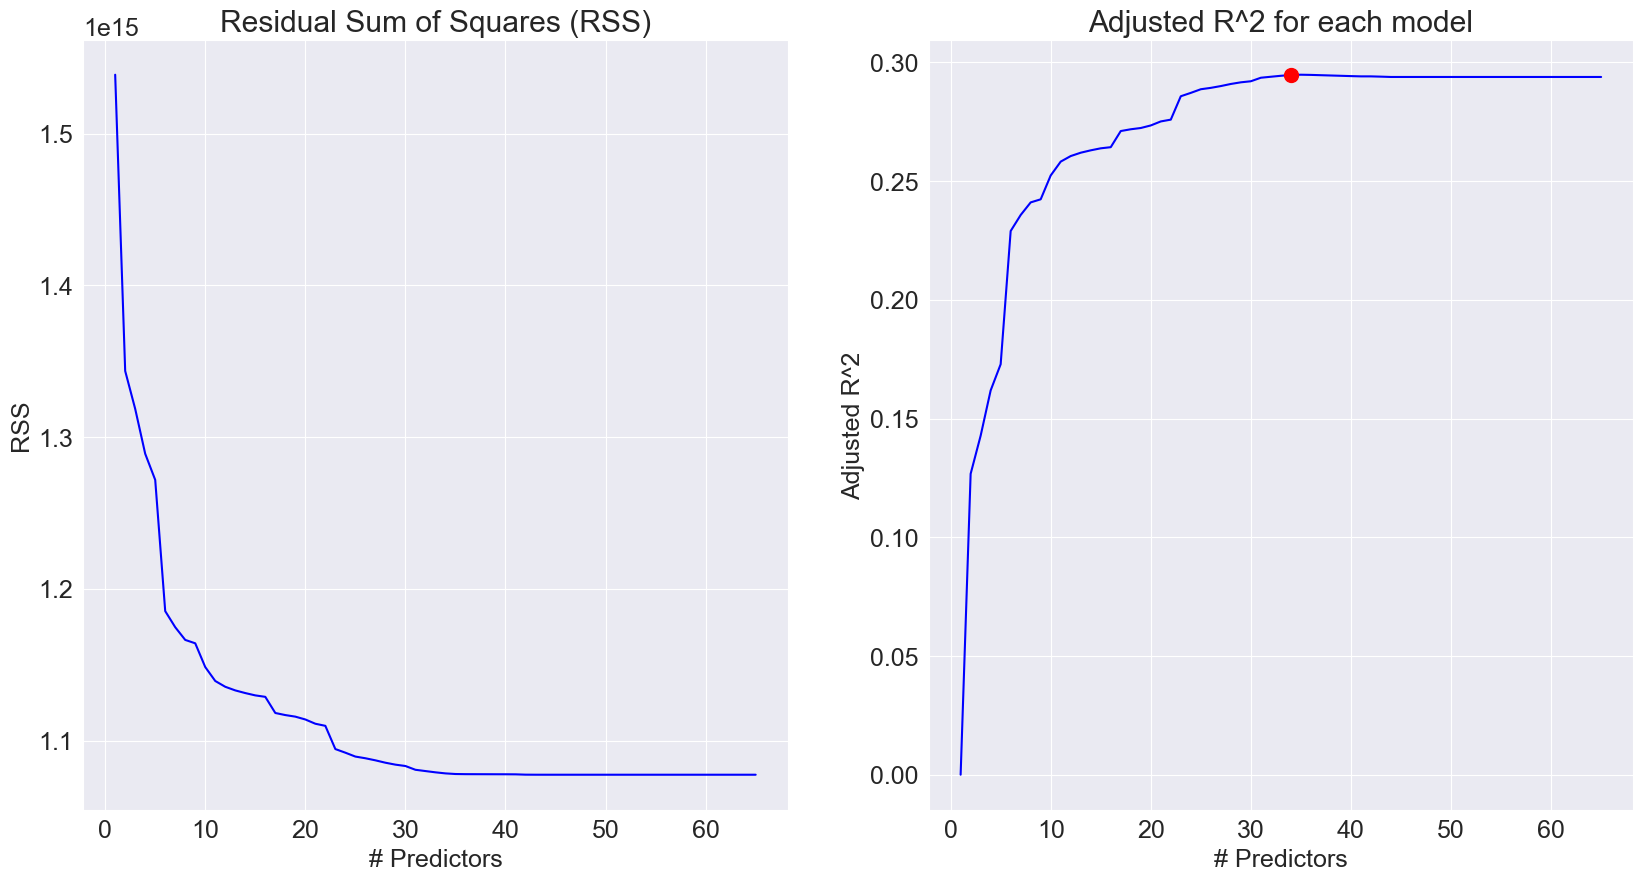

R2 score (training): 0.2992272160334868
R2 score (test): 0.2686961410620696
RMSE (test): 464686.48941871105
MSE (training): 211448939328.57776
MSE (test): 215933533448.28583


In [130]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import time
import math

X = data.drop(['Weekly_Sales'], axis=1)
y = data['Weekly_Sales']

interaction = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X = pd.DataFrame(interaction.fit_transform(X), columns=interaction.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['Store'])

def processSubset(feature_set):
    model = sm.OLS(y_train, X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_train[list(feature_set)]) - y_train) ** 2).sum()
    return {'model': regr, 'RSS': RSS}

def forward(predictors):
    
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print('Processed', models.shape[0], 'models on', len(predictors)+1, 'predictors in', (toc-tic), 'seconds.')
    
    return best_model

models_fwd = pd.DataFrame(columns=['RSS', 'model'])

tic = time.time()
predictors = []

for i in range(1, len(X_train.columns) + 1):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]['model'].model.exog_names

toc = time.time()
print('Total elapsed time:', (toc-tic), 'seconds.')

rsquared_adj = models_fwd.apply(lambda row: row[1].rsquared_adj, axis=1)

best_model_index = rsquared_adj.argmax()
best_model = models_fwd.loc[best_model_index, 'model']

print(best_model.summary())

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(1, 2, 1)
plt.plot(models_fwd['RSS'])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.title('Residual Sum of Squares (RSS)')

plt.subplot(1, 2, 2)
plt.plot(rsquared_adj)
plt.plot(best_model_index, rsquared_adj.max(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('Adjusted R^2')
plt.title('Adjusted R^2 for each model')
plt.show()

features_fwd = best_model.model.exog_names
X_train_fwd = X_train[features_fwd]
X_test_fwd = X_test[features_fwd]

lr = LinearRegression().fit(X_train_fwd, y_train)
y_pred_fwd = lr.predict(X_test_fwd)

print('R2 score (training):', r2_score(y_train, lr.predict(X_train_fwd)))
print('R2 score (test):', r2_score(y_test, y_pred_fwd))
print('RMSE (test):', math.sqrt(mean_squared_error(y_test, y_pred_fwd)))
print('MSE (training):', mean_squared_error(y_train, lr.predict(X_train_fwd)))
print('MSE (test):', mean_squared_error(y_test, y_pred_fwd))

# Régression linéaire

In [126]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse_train = mean_squared_error(y_train, lr.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print(f'R2 score (training): {r2_score(y_train, lr.predict(X_train)):.2f}')
print(f'R2 score (test): {r2_score(y_test, y_pred):.2f}')
print(f'RMSE (test): {math.sqrt(mse_test):.2f}')
print(f'MSE (training): {mse_train:.2f}')
print(f'MSE (test): {mse_test:.2f}')
print("Coefficients: \n", lr.coef_)

R2 score (training): 0.15
R2 score (test): 0.14
RMSE (test): 509517.81
MSE (training): 273878200387.57
MSE (test): 259608397462.97
Coefficients: 
 [-15516.46225115  -1751.91276178  91147.76305102  -2065.00740612
 -22561.05212889 -41872.79016592  14332.2377103       0.
 -22688.12421061  22688.12421061]


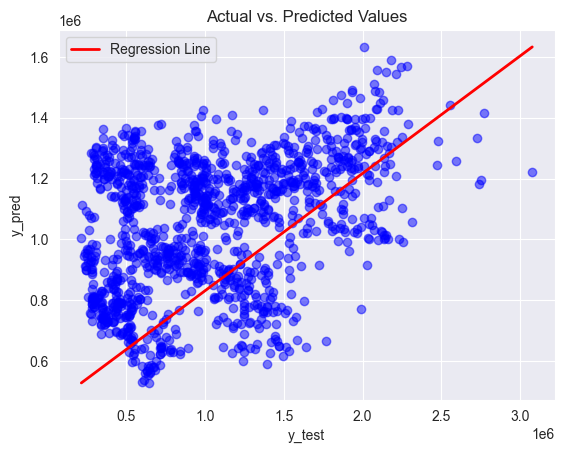

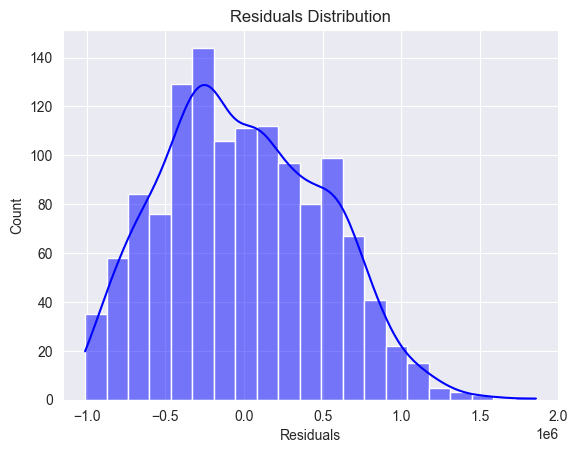

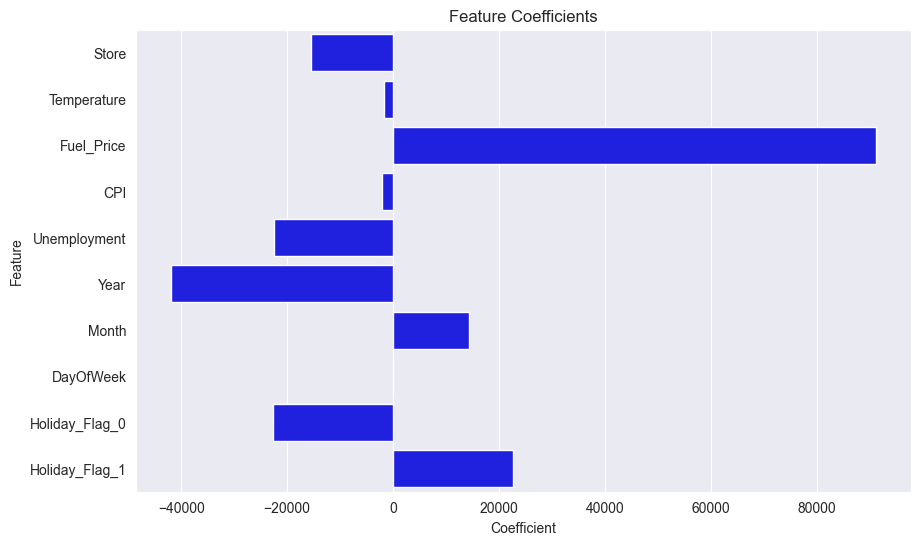

In [127]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linewidth=2, label='Regression Line')

plt.legend()
plt.show()

# Plot the residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr.coef_})
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Coefficients")
plt.show()

# Ridge

Store            -201489.922884
Temperature       -32499.985506
Fuel_Price         41751.355503
CPI               -81217.306073
Unemployment      -42285.428510
Year              -33277.603609
Month              46462.488850
DayOfWeek              0.000000
Holiday_Flag_0     -5823.117394
Holiday_Flag_1      5823.117394
dtype: float64
MSE (training): 273878203007.19
MSE (test): 259606358887.41
R2 score (training): 0.15
R2 score (test): 0.14
RMSE (test): 509515.81


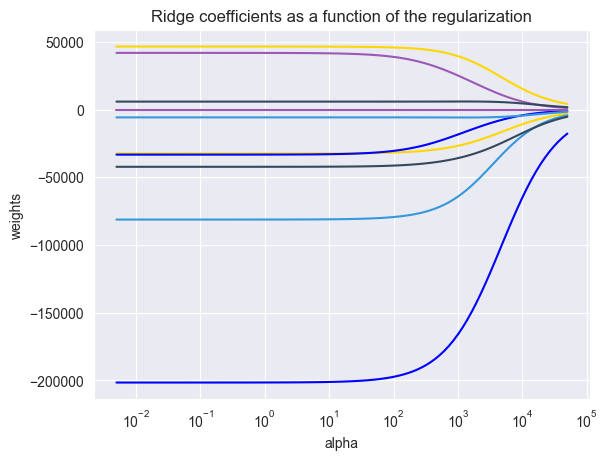

MSE (training): 273888229310.70
MSE (test): 259494585432.68
R2 score (training): 0.15
R2 score (test): 0.14
RMSE (test): 509406.11


In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

ridge_pipeline = make_pipeline(StandardScaler(), Ridge())

ridge_pipeline.fit(X_train, y_train)

ridge = ridge_pipeline.named_steps['ridge']
print(pd.Series(ridge.coef_, index=X.columns))

print('MSE (training): %.2f' % mean_squared_error(y_train, ridge_pipeline.predict(X_train)))
print('MSE (test): %.2f' % mean_squared_error(y_test, ridge_pipeline.predict(X_test)))

print('R2 score (training): %.2f' % r2_score(y_train, ridge_pipeline.predict(X_train)))
print('R2 score (test): %.2f' % r2_score(y_test, ridge_pipeline.predict(X_test)))
print('RMSE (test): %.2f' % math.sqrt(mean_squared_error(y_test, ridge_pipeline.predict(X_test))))

alphas = 10**np.linspace(5, -2, 100) * 0.5

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

ridgecv = RidgeCV(alphas=alphas, cv=10, scoring='neg_mean_squared_error')
ridgecv.fit(X_train_scaled, y_train)

print('MSE (training): %.2f' % mean_squared_error(y_train, ridgecv.predict(X_train_scaled)))
print('MSE (test): %.2f' % mean_squared_error(y_test, ridgecv.predict(X_test_scaled)))

print('R2 score (training): %.2f' % r2_score(y_train, ridgecv.predict(X_train_scaled)))
print('R2 score (test): %.2f' % r2_score(y_test, ridgecv.predict(X_test_scaled)))
print('RMSE (test): %.2f' % math.sqrt(mean_squared_error(y_test, ridgecv.predict(X_test_scaled))))


# Lasso

In [134]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import numpy as np
import math
from sklearn.metrics import mean_squared_error, r2_score

pipeline = make_pipeline(StandardScaler(), LassoCV(alphas=None, cv=10, max_iter=100000))

pipeline.fit(X_train, y_train)

lassocv = pipeline.named_steps['lassocv']
lassocv_alpha = lassocv.alpha_

print('Number of features used:', np.sum(lassocv.coef_ != 0))

print('MSE (training): %.2f' % mean_squared_error(y_train, pipeline.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, pipeline.predict(X_test)), sep='\n')

print('R2 score (training): %.2f' % r2_score(y_train, pipeline.predict(X_train)),
      'R2 score (test) %.2f' % r2_score(y_test, pipeline.predict(X_test)),
      'RMSE (test): %.2f' % math.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))), sep='\n')


Number of features used: 35
MSE (training): 214540910636.15
MSE (test): 218399459627.58
R2 score (training): 0.29
R2 score (test) 0.26
RMSE (test): 467332.28


# Elastic Net

In [135]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": [0.1, 0.5, 1], "l1_ratio": [0.1, 0.5, 0.9]}

model = ElasticNet()

grid_search = GridSearchCV(model, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

print('MSE (training): %.2f' % mean_squared_error(y_train, grid_search.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, grid_search.predict(X_test)), sep='\n')

print('R2 score (training): %.2f' % r2_score(y_train, grid_search.predict(X_train)),
      'R2 score (test) %.2f' % r2_score(y_test, grid_search.predict(X_test)),
      'RMSE (test): %.2f' % math.sqrt(mean_squared_error(y_test, grid_search.predict(X_test))), sep='\n')

{'alpha': 1, 'l1_ratio': 0.1}
0.2780300195602948
MSE (training): 214496534025.64
MSE (test): 218129985866.75
R2 score (training): 0.29
R2 score (test) 0.26
RMSE (test): 467043.88


# KNN

Predicted value for new observation with first feature 2.5: 1163366.6925
R2 score (training): 0.84
R2 score (test) 0.70
MSE (test): 88143327871.31


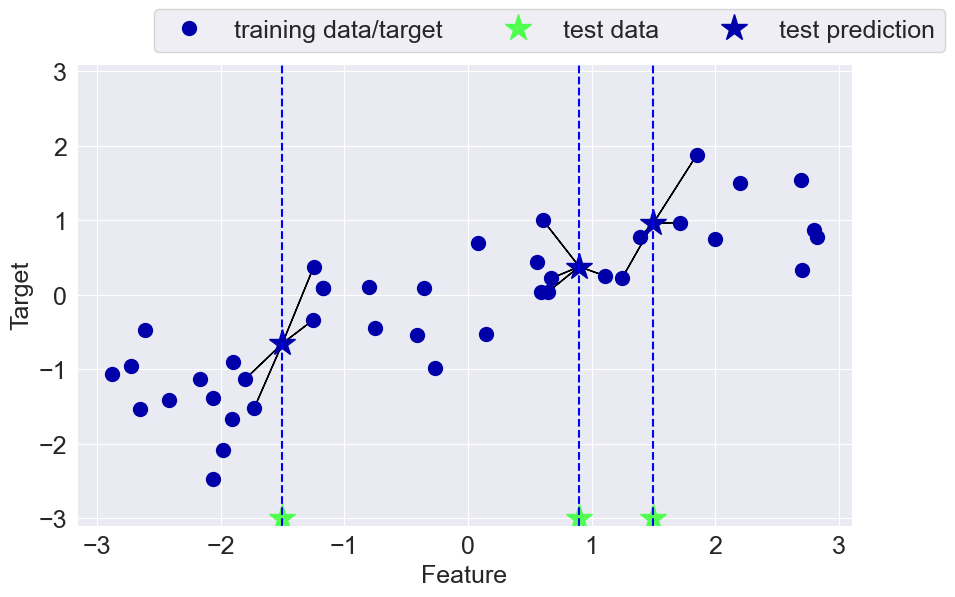

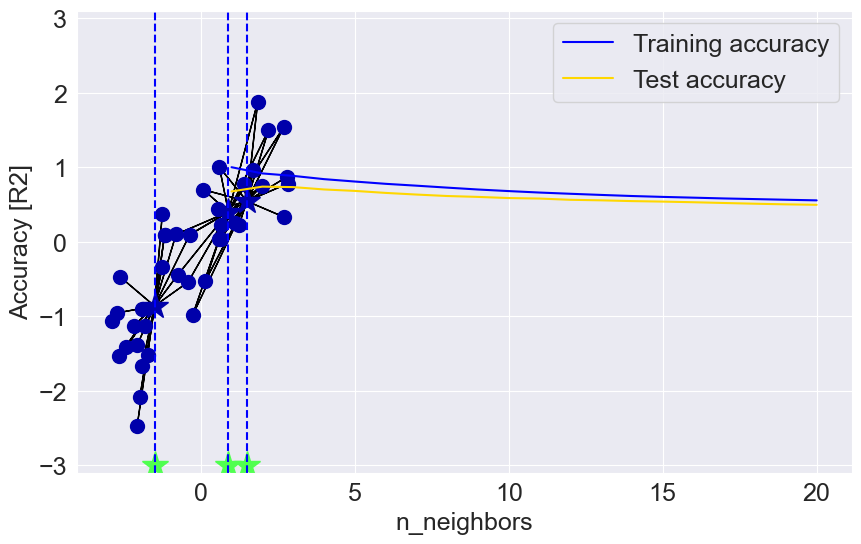

In [139]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

knnreg = KNeighborsRegressor(n_neighbors=4)

knnreg.fit(X_train, y_train)

y_pred = knnreg.predict(X_test)

n_features = X_train.shape[1]  
new_observation = [2.5] + [0] * (n_features - 1)  

mglearn.plots.plot_knn_regression(n_neighbors=4)
mglearn.plots.plot_knn_regression(n_neighbors=20)

y_pred_new = knnreg.predict([new_observation])

print('Predicted value for new observation with first feature 2.5:', y_pred_new[0])

print('R2 score (training): %.2f' % r2_score(y_train, knnreg.predict(X_train)),
      'R2 score (test) %.2f' % r2_score(y_test, y_pred),
      'MSE (test): %.2f' % mean_squared_error(y_test, y_pred), sep='\n')

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    
    knnreg = KNeighborsRegressor(n_neighbors=n_neighbors)
    knnreg.fit(X_train, y_train)
    
    training_accuracy.append(knnreg.score(X_train, y_train))

    test_accuracy.append(knnreg.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test accuracy')
plt.ylabel('Accuracy [R2]')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

# KNN Weighted

In [ ]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

knnreg = KNeighborsRegressor(n_neighbors=6, weights='distance')

knnreg.fit(X_train, y_train)

mglearn.plots.plot_knn_regression(n_neighbors=1)
mglearn.plots.plot_knn_regression(n_neighbors=20)

y_pred = knnreg.predict(X_test)

print('R2 score (training): %.2f' % r2_score(y_train, knnreg.predict(X_train)),
      'R2 score (test) %.2f' % r2_score(y_test, y_pred),
      'MSE (test): %.2f' % mean_squared_error(y_test, y_pred), sep='\n')

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    
    knnreg = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
    
    knnreg.fit(X_train, y_train)

    training_accuracy.append(knnreg.score(X_train, y_train))

    test_accuracy.append(knnreg.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='Training')
plt.plot(neighbors_settings, test_accuracy, label='Test')
plt.ylabel('Accuracy [R2]')
plt.xlabel('n-neighbors [K]')
plt.xticks(np.arange(1, 21), labels=[str(i) for i in range(1, 21)])
plt.legend()

Trr = []; Tss = []
n_degree = 10

for i in range(2, n_degree):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train)
    X_poly1 = poly_reg.transform(X_test)
    LR = LinearRegression()
    LR.fit(X_poly, y_train)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))

plt.figure(figsize=[15, 6])
plt.subplot(1, 2, 1)
plt.plot(range(2, n_degree), Trr, label='Training')
plt.plot(range(2, n_degree), Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, n_degree), Trr, label='Training')
plt.plot(range(2, n_degree), Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0, 2e16])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
plt.show()

degree = 3  
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


R2 score (training): 1.00
R2 score (test) 0.73
MSE (test): 80362136261.91


# Random Forest

In [68]:
x = data.drop(['Weekly_Sales', 'Holiday'], axis=1)
y = data['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=data['Store'])

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(x_train, y_train)

rf_predictions = rf_regressor.predict(x_test)

rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
print(f'Random Forest RMSE: {rf_rmse}')

Random Forest RMSE: 115932.84115214767


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

def print_score(regressor, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = regressor.predict(x_train)
        print("Train Result:\n==========================================")
        print(f"MAE: {mean_absolute_error(y_train, pred)}\n")
        print(f"MSE: {mean_squared_error(y_train, pred)}\n")
        print(f"RMSE: {np.sqrt(mean_squared_error(y_train, pred))}\n")
        print(f"R^2: {r2_score(y_train, pred)}\n")
    elif not train:
        pred = regressor.predict(x_test)
        print("Test Result:\n===========================================")
        print(f"MAE: {mean_absolute_error(y_test, pred)}\n")
        print(f"MSE: {mean_squared_error(y_test, pred)}\n")
        print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}\n")
        print(f"R^2: {r2_score(y_test, pred)}\n")

print_score(rf_regressor, x_train, y_train, x_test, y_test, train=True)

print_score(rf_regressor, x_train, y_train, x_test, y_test, train=False)


Train Result:
MAE: 24590.44130057017

MSE: 1916529697.0231304

RMSE: 43778.187457033106

R^2: 0.9936483396152185

Test Result:
MAE: 64365.54631536645

MSE: 13440423657.609102

RMSE: 115932.84115214767

R^2: 0.9544812075752738



# Decision tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(x_train, y_train)

dt_predictions = dt_regressor.predict(x_test)

dt_rmse = sqrt(mean_squared_error(y_test, dt_predictions))
print(f'Decision Tree RMSE: {dt_rmse}')

Decision Tree RMSE: 147484.2637313997


In [76]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train)

print_score(dt_regressor, x_train, y_train, x_test, y_test, train=False)


Test Result:
MAE: 78815.02720775909

MSE: 21751608048.39306

RMSE: 147484.2637313997

R^2: 0.9263336516108797



# Features importance

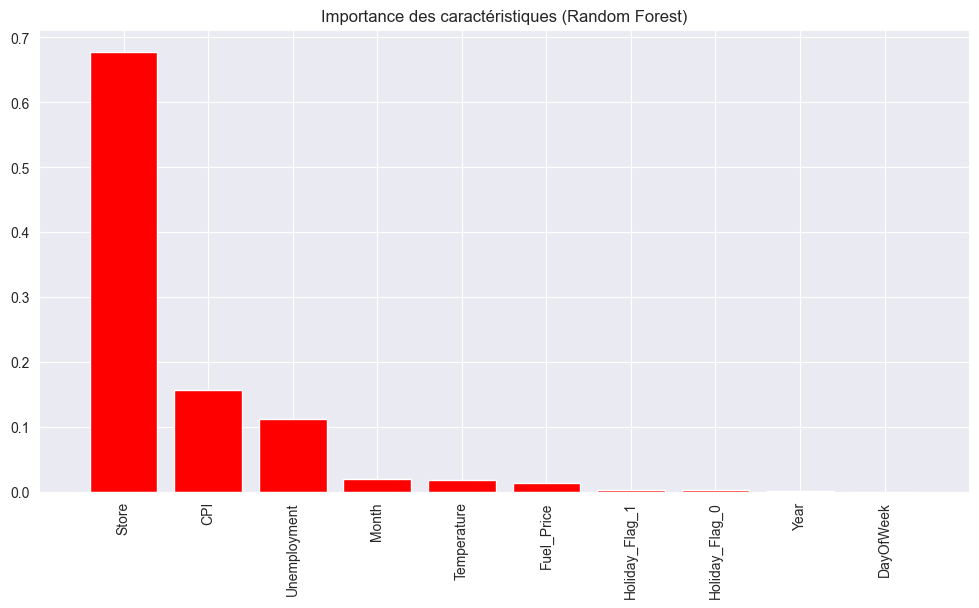

In [79]:
import numpy as np
import matplotlib.pyplot as plt

rf_regressor.fit(x_train, y_train)

importances_rf = rf_regressor.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importance des caractéristiques (Random Forest)")
plt.bar(range(x_train.shape[1]), importances_rf[indices_rf],
        color="r", align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices_rf], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

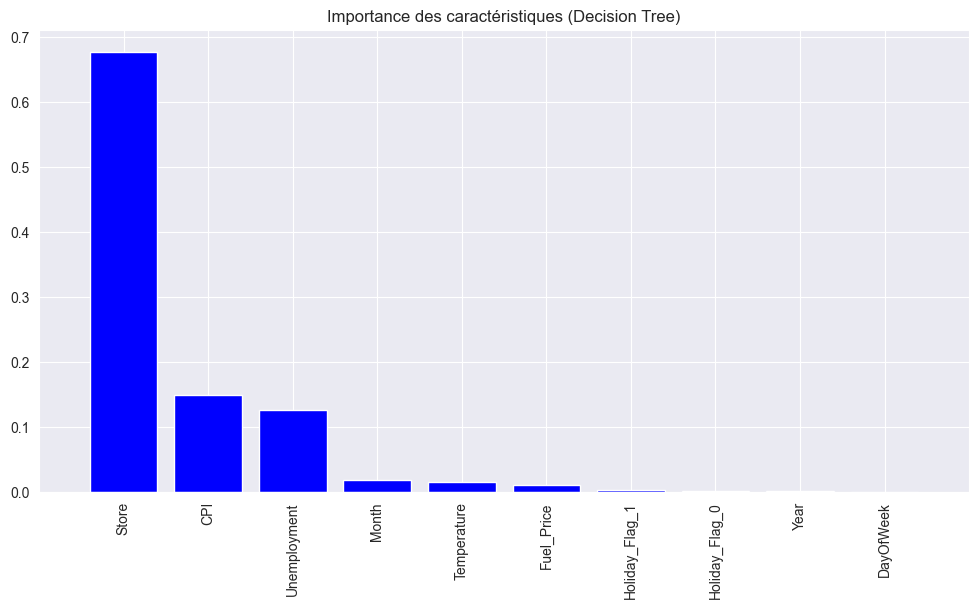

In [80]:
dt_regressor.fit(x_train, y_train)

importances_dt = dt_regressor.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importance des caractéristiques (Decision Tree)")
plt.bar(range(x_train.shape[1]), importances_dt[indices_dt],
        color="b", align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices_dt], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()